# Programmation de la classe noeud

In [1]:
import networkx as nx               # network graph manipulation


from networkx.drawing.nx_pydot import graphviz_layout


import pandas as pd                 # data mnipulation
import numpy as np                  # ----------------

import matplotlib.pyplot as plt     # show graphics
%matplotlib inline

import math                         # mathematics tools

import time                         # evaluate the the performance of the algorithms


## Structure de la classe Noeuds

La classe noeud va nous permettre d'avoir une structure de données qui va contenir les données du problème. Nous allons coder ainsi un ensemble de méthodes, qui vont nous permettre de manipuler cet ensemble de données.

In [2]:
class Node :

    def __init__ (self , N , a , d , q) :

        #   attributs to stock the data

        self._N = []
        self._a = {}
        self._d = {}
        self._q = {}

        k = 0

        for i in N :

            self._N.append(i)
            self._a[i] = a[k]
            self._q[i] = q[k]
            self._d[i] = d[k]

            k+=1


        # lower bound of the problem
        self._LB = -math.inf

        #   attribut to link the nodes in a tree.
        self._parent = None
        self._children = []

        # attributs to construct the branch and bound tree
        self._update_sol = False
        self._order = 0             
        self._edge = 0

Creation of a first node. This first node, is the node that is given 

In [3]:
''' 
Beware the different set have to be sorted with respect to N
'''

N = list(range(1,8))
a = [10,13,11,20,30,0,30]
d = [5,6,7,4,3,6,2]
q = [7,26,24,21,8,17,0]

e = Node(N,a,d,q)

### Implémentation des méthodes de classe.

Nous allons dans la suite programmer les différentes méthodes de la classe **Node**, et les ajouter à notre structure, à l'aide de la fonction **setattr** que propose R

#### Une méthode d'affichage

Cette première méthode d'affichage, permettra par la suite de venir afficher notre noeud. Elle ne nous servira que pour des petites instances de notre problème.

In [4]:
def _to_string(self) :

    '''
    print of the node
    '''

    print("Task : " , end =" ")

    for i in self._N :
        print(i , end = " ")
    print()
    print("       ",end = " ")

    for i in self._N :
        s = str(self._a[i])
        print(s , end = " ")
    print()
    print("       ",end = " ")
    for i in self._N :
        s = str(self._d[i])
        print(s , end = " ")
    print()
    print("       ",end = " ")
    for i in self._N :
        s = str(self._q[i])
        print(s , end = " ")

setattr(Node , "_to_string" , _to_string)

e._to_string()

Task :  1 2 3 4 5 6 7 
        10 13 11 20 30 0 30 
        5 6 7 4 3 6 2 
        7 26 24 21 8 17 0 

#### Travail sur le graphe de conjonction

Dans cette section nous allons travailler sur le graphe de conjonction associé à une programmation de Schrage. Ce graphe de programmation joue un rôle essentiel, que nous allons bien expliquer par la suite.

- La première fonction prend en argument simplement une programmation (une permutation de notre ensemble de tache), et va venir construire le graphe de conjonction associé à cette programmation. La sortie de cette fonction est un graphe networkx orienté (**nx.DiGraph**)

- La seconde fonction prend en argument aussi une programmation. Elle vient construire le graphe de conjonction, et trouve ensuite le plus long chemin dans ce graphe. Elle rend un dictionnaire python avec une valeur de plus long chemin, et un chemin.

Dans cette partie on pourra en faite s'amuser à venir optimiser notre fonction de recherche de plus long chemin.

In [5]:
def _construct_conjonctive (self , schedule):
    ''' 
    output : the conjonctive graph for a given schedule
    '''

    # construction of a directed graph :
    G = nx.DiGraph() 

    # construction of the submit :

    sbm = ['s','t']+schedule
    G.add_nodes_from(sbm)

    # construction of the edges.
    # shcedule --> permutation of element of self._N


    for i in range(len(schedule)) :

        curr = schedule[i]
        
        e1 = ("s",curr , self._a[curr])
        e2 = (curr,"t",self._q[curr]+self._d[curr])
        # we check if we are at the last task of the schedule
        if i != len(schedule)-1 :
            next = schedule[i+1]
            e3 = (curr,next,self._d[curr]) # creation of the last edges.
            G.add_weighted_edges_from([e1,e2,e3])
        else :
            G.add_weighted_edges_from([e1,e2])
    
    # we return the conjunctive graph.
    return(G)

setattr(Node , "_construct_conjonctive" , _construct_conjonctive)



In [6]:
def _print_graph(self , schedule , path ,Larg , Haut) :
    
    G = self._construct_conjonctive(schedule)

    # color of the edges
    for (u,v) in G.edges():
        G[u][v]['color'] = 'grey'

    for k in range(len(path)) :
        curr = path[k] # current note
        if k==0 :
            next = path[k+1]
            G['s'][curr]['color'] = 'red'
            G[curr][next]['color'] = 'red'

        elif k == len(path)-1 :
            G[curr]['t']['color'] = 'red'

        else :

            next = path[k+1]
            G[curr][next]['color'] = 'red'

    colors = [G[u][v]['color'] for u,v in G.edges()]
    weights = [G[u][v]['weight'] for u,v in G.edges()]

    # color of the nodes
    couleurs_sommets = ["yellow"] * G.number_of_nodes()   


    pos = {} # positions of the node.
    
    set_x = 0
    set_y = len(schedule)/2
    dy = -1

    
    for t in schedule : 
        pos[t] = [set_x , set_y]
        set_y += dy

    # position of the sources nodes.
    pos['s'] = [-1 , 0]
    pos['t'] = [1, 0]


    options = {
    'node_color' : couleurs_sommets,
    'node_size'  : 550,
    'pos' : pos,
    'edge_color' : colors,
    'with_labels': True,
    }

    fig = plt.figure(figsize=(Larg,Haut))
    nx.draw(G,**options)
    labels = nx.get_edge_attributes(G,'weight')


    nx.draw_networkx_edge_labels(G,edge_labels = labels,pos = pos)
    # title of the print
    plt.title("Conjunctive graph associate with : {}".format(schedule))
    plt.show()

setattr(Node , "_print_graph" , _print_graph)

We can also do our graph with the help of matplotlib : **https://plotly.com/python/network-graphs/**

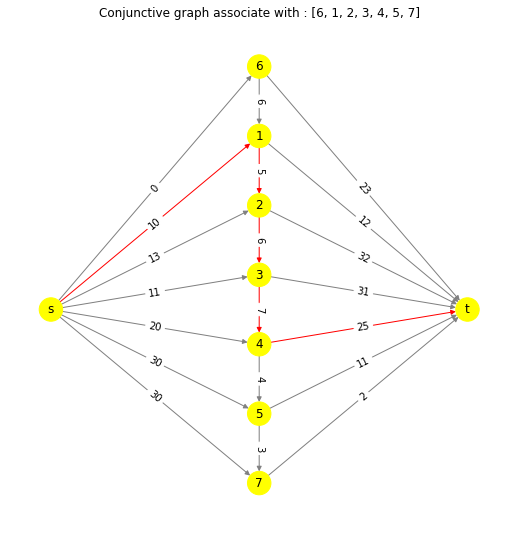

In [7]:
tab = [6, 1, 2, 3, 4, 5, 7] # schedule of the subject
e._print_graph(tab , [1, 2, 3, 4] ,7,7) # print of the schedule.

The objective now is to create an algorithme that find the longest path in this graph. Because of the structure of the graph, we can add somme intelligence to the alogrithm. We will first parcour, all the node in the schedule. Then we will look at the output node *t*

In [8]:
def _longest_path(self, schedule):
    
    '''
    output : python dictionnary
        - value : the length of the longest past
        - path : the tasks of N in the path.
    '''

    L = {}      # dictionnary that will contain the distances
    pred = {}   # dictionnary that will contain the predecessors


    # 1 : initiation of the values

    L['s'] = 0
    pred['s'] = 's'

    L['t'] = -math.inf

    
    for k in schedule :
        L[k] = self._a[k]
        pred[k] = 's'

    # 2 : propagation of the solution :

    for i in range(len(schedule)) :

        curr = schedule[i]                  #    current node to treat.
                                            #    we'll check the succesors of curr 
        if i != len(schedule)-1 :

            next = schedule[i+1]            # next node in the order.
            new_L = L[curr]+self._d[curr]

            if (new_L > L[next]) :
                L[next] = new_L
                pred[next] = curr
        
                                            # we'll change the value of the path to t
                                            # from the current node.
                                            
        new_t = L[curr]+self._d[curr]+self._q[curr]

        if new_t > L['t'] :
            pred['t'] = curr
            L['t'] = new_t

    
    # backpropagation to find the path
    temp = 't'
    makespan = L['t']
    path = ['t']


    while temp !='s':

        path.insert(0,pred[temp]) # add to the begining
        temp = pred[temp]

    path.pop()
    path.pop(0)
    

    res = {'value' : makespan , 'path' : path}


    
    return(res)


setattr(Node , "_longest_path" , _longest_path)

In [9]:
e._longest_path(tab)


{'value': 53, 'path': [1, 2, 3, 4]}

#### Work on the Schrage schedule

Now we need to find the schrage schedule. This particular schedule, is at the heart of the proble, and will help us to find a solution of the problem. The schrage schedule of a given node, is just a special permutation of the set _N of this node. The next function will show how to find this schedule.

In [10]:
def _schrage_schedule(self) :
        #       Step 1
        n = len(self._N)
        U = []
        b_U = self._N.copy()
        t = min([self._a[i] for i in b_U])

        #       step 2 and 3
        while (len(U) != n) :
                arg_set = []                        # set where we search for the argmax
                for j in b_U :
                        if self._a[j] <= t :
                                arg_set.append(j)

                buff = [self._q[j] for j in arg_set]

                idx_arg_max = np.argmax(buff)
                i = arg_set[idx_arg_max]

                b_U.remove(i)
                U.append(i)

                ti = t
                buff = [self._a[j] for j in b_U]

                if len(buff)==0 :
                        t = ti + self._d[i]
                else :
                        t = max(ti + self._d[i] , min(buff))

        return U

setattr(Node , "_schrage_schedule" , _schrage_schedule)

In [11]:
e._schrage_schedule()

[6, 1, 2, 3, 4, 5, 7]

In [12]:
e._to_string()

Task :  1 2 3 4 5 6 7 
        10 13 11 20 30 0 30 
        5 6 7 4 3 6 2 
        7 26 24 21 8 17 0 

In [13]:
def _schrage_makespan(self) :
    '''
    output : {'makespan' : int , 'longest_path : int []}

        'longest_path' : list of element of self._N.
        'makespan' : length of the longest path (length of longest path).
    '''

    res = {'makespan' : 0 , 'longest_path' : []}

    shr_schedule = self._schrage_schedule()         # given a node we calculate the schrage schedule
    long_path = self._longest_path(shr_schedule)    # calculus of the longest path --> path + makespan


    res["longest_path"] = long_path['path']         # storage of the path
    res["makespan"] = long_path['value']            # storage of the length of the path.

    return(res)


setattr(Node , "_schrage_makespan" , _schrage_makespan)

#### Recherche des ensembles critiques

Dans cette section, nous allons nous concentrer sur la recherche des ensembles critiques qui sont liés à un noeud en particulier. Ces ensembles critiques vont nous permettre d'identifier dans notre programmation les ensembles qui posent problème.

In [14]:
def _critical_search(self,schedule) :

    '''
    input : python array
        - the array is a permutation of the set self._N

    output : python dictionnary
        - makespan : time of the schedule
        - J : critical set (if it exists)
        - jc : critical task (if it exists)
        - status : status of the schrage schedule
    '''
    
    output = self._longest_path(schedule) # search for the longest path
    path = output['path']                 # get the path
    makespan = output['value']            # time that the schedule will take


    jp = path[-1]           # last task to worry about
    target = self._q[jp]
    J = [jp]                # critical set
    jc = -1                 # critical task
    status = ''             # status of the schedule.

    # search of a potential critical task  --> we search from the end to the begining of the path.
    # the critical set will grow wathever happens.

    for i in range(len(path)-2 , -1 , -1) :

        jk = path[i]
        buff = self._q[jk]

        if (buff<target) :
            # critical set found, we stop.
            jc = jk
            break
        else :
            J.append(jk)

    
    if(jc == -1):
        # critical task not found --> schedule is optimal
        #                         --> the critical set doesn't exists
        J = []
        status = 'optimal'
    else :
        status = 'not_optimal'

    
    # dictionnary to return
    res = {'makespan' : makespan , 'J' : J , 'jc' : jc , 'status' : status}

    return(res)

setattr(Node,"_critical_search",_critical_search)

In [15]:
e._critical_search(tab)

{'makespan': 53, 'J': [4, 3, 2], 'jc': 1, 'status': 'not_optimal'}

In [16]:
def _lower_bound(self , I) :

    a = min([self._a[i] for i in I])
    d = sum([self._d[i] for i in I])

    q = min([self._q[i] for i in I])

    return(a+d+q)

setattr(Node,"_lower_bound",_lower_bound)

#### Creation of the nodes

In [17]:
def _nodes_creation(self , J , jc):

    ''' 
    output : python array
        - the first node is the node where we changed the value of q
        - the second node is the node where we changed the value of a
    '''
    jp = J[0]

    q_jc = sum([self._d[r] for r in J]) + self._q[jp]
    a_jc = min([self._a[r] for r in J]) + sum([self._d[r] for r in J])

    N = self._N.copy()

    a1 = []
    a2 = []

    d1 = []
    d2 = []

    q1 = []
    q2 = []

    for i in N :
        a1.append(self._a[i])
        a2.append(self._a[i])
        d1.append(self._d[i])
        d2.append(self._d[i])
        q1.append(self._q[i])
        q2.append(self._q[i])

    e1 = Node(N , a1 , d1 , q1)
    e2 = Node(N , a2 , d2 , q2)


    e1._q[jc] = q_jc
    e1._edge = q_jc


    e2._a[jc] = a_jc
    e2._edge = a_jc

    return([e1,e2])
setattr(Node,"_nodes_creation",_nodes_creation)

This first solution will not use the bounds of the problem

In [18]:
def branch_n_bound(N , a , d , q , msg = 0) :

    Tree = []       # list of all nodes created (a list of Node objects)
    Queue = []      # list of nodes to process (a list of integers with the index of nodes to process in the Tree)
    UB = math.inf   # set the upper bound to a sufficiently large number
                    
    ϵ = 0.0001      # an optimality tolerance of %0.01
    incumbent = []  # initialize the incumbent solution

    root = Node(N , a , d , q)      # at the root node no variables are fixed

    Tree.append(root)               # start the tree with the root node
    Queue.append(0)

    LB = root._lower_bound(N)

    
    order = 0

    while (Queue!=[]) :                     #   while there is nodes to treat :
        
        currentindex = Queue[0]             # note that we follow a first-in-first-out node processing strategy
        currentnode = Tree[currentindex]

        #   evaluation step :
        shr_schedule = currentnode._schrage_schedule()
        output = currentnode._critical_search(shr_schedule)
        currentUB = output['makespan']
        currentLB = currentnode._LB

        # order of the nodes in th branch and bound --> construction of the tree
        currentnode._order = order
        order += 1


        #   --> update of the upper bound
        #   --> update of the current solution

        if currentUB < UB :
            UB = currentUB
            incumbent = shr_schedule
            currentnode._update_sol = True  # this node made the current solution better


        if (output['status']=='not_optimal') :
            #   creation of the nodes
            e1 , e2 = currentnode._nodes_creation(output['J'],output['jc'])

            # update of the relationships
            e1._parent = currentnode
            e2._parent = currentnode

            currentnode._children = [e1,e2]

            # update of the tree and the queue

            Queue.append(len(Tree))
            Queue.append(len(Tree)+1)

            Tree.append(e1)
            Tree.append(e2)

            #   update of the local lower bound
            e1._LB = max(currentLB , e1._lower_bound(output['J']) , e1._lower_bound(output['J']+[output['jc']] ))
            e2._LB = max(currentLB , e2._lower_bound(output['J']) , e2._lower_bound(output['J']+[output['jc']] ))
        

        LB = max([Tree[n]._LB for n in Queue]) # global lower
        
        
        Queue.remove(currentindex)


        

    return {'UB' : UB , 'LB' : LB , 'SCHD': incumbent , 'Tree' : Tree}


    

In [19]:
def construct_tree(Tree) :
    '''
    Construction of the branch and bound treee
    '''

    bb_tree = nx.DiGraph()

    colors = [0]*len(Tree)
    nx.set_node_attributes(bb_tree, 'colors', colors)

    Queue = [Tree[0]]
    marked = [Tree[0]]                  # Nodes of the bb_tree treated

    colors = []
    while (Queue != []) :

        buff = Queue.pop(0)             # we take the first

        if (buff not in marked):
                bb_tree.add_node(buff._order)
                marked.append(buff)

        if (len(buff._children) != 0) :
            
            Queue += buff._children     # we add the children

            for n in buff._children :
                if (n not in marked) :
                    bb_tree.add_node(n._order)

                    bb_tree.add_weighted_edges_from([(buff._order , n._order , n._edge)])
                    marked.append(n)


    return bb_tree
            
        
        

    

In [20]:
def print_bb_tree(Tree , Larg = 7 , Haut = 7):

    G = construct_tree(Tree)

    pos = graphviz_layout(G, prog="dot")

    nds = G.nodes()
    colors = []


    for n in nds :
        for t in Tree :
            if n==t._order :
                if t._update_sol :
                    colors.append('green')
                else :
                    colors.append('grey')

    options = {
    'node_color' :  colors,
    'node_size'  : 550,
    'pos' : pos,
    'with_labels': True,
    }

    fig = plt.figure(figsize=(Larg,Haut))
    nx.draw(G,**options)
    labels = nx.get_edge_attributes(G,'weight')


    nx.draw_networkx_edge_labels(G,edge_labels = labels,pos = pos)
    plt.title("Arbre de branchement associé au problème")
    plt.show()


--- Solution of the one machine sequencing problem ---

optimal value :  50
schedule :  [6, 3, 2, 4, 1, 5, 7]
running time :  0.0007381439208984375

--- The conjunctive graph ---


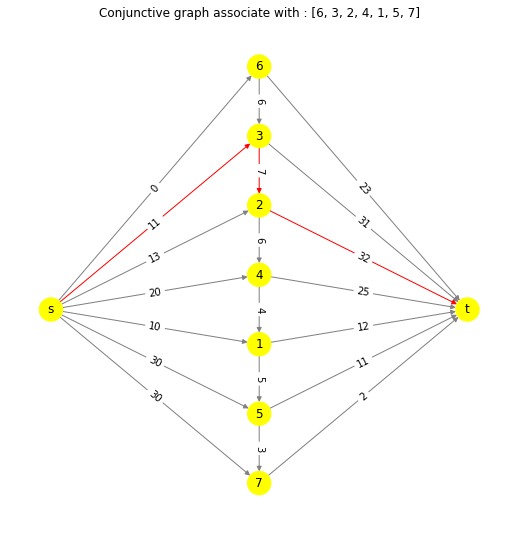

In [21]:
N = list(range(1,8))
a = [10,13,11,20,30,0,30]
d = [5,6,7,4,3,6,2]
q = [7,26,24,21,8,17,0]

r = Node(N,a,d,q)


start = time.time()
solution = branch_n_bound(N , a , d , q)
end = time.time()-start

## print of the solution
print("--- Solution of the one machine sequencing problem ---")
print()
print("optimal value : ",solution['UB'])
print("schedule : ",solution['SCHD'])
print("running time : ",end)
print()
print("--- The conjunctive graph ---")

lg_path = r._longest_path(solution['SCHD'])['path']

r._print_graph(solution['SCHD'] , lg_path, 7 , 7)


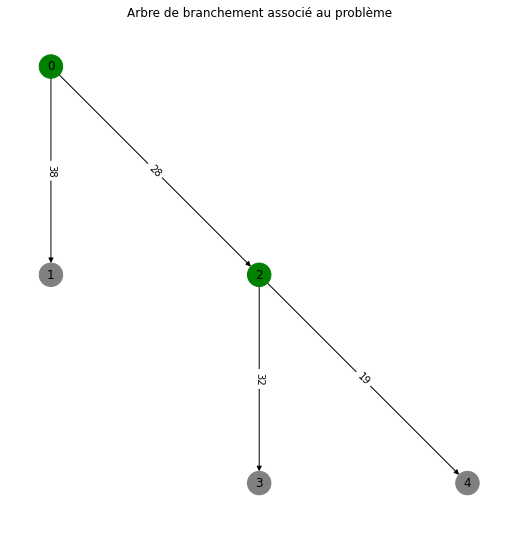

In [22]:
print_bb_tree(solution['Tree'])

In [23]:
N

[1, 2, 3, 4, 5, 6, 7]

--- Solution of the one machine sequencing problem ---

optimal value :  56
schedule :  [1, 7, 4, 3, 2, 6, 5]
running time :  0.0011210441589355469

--- The conjunctive graph ---


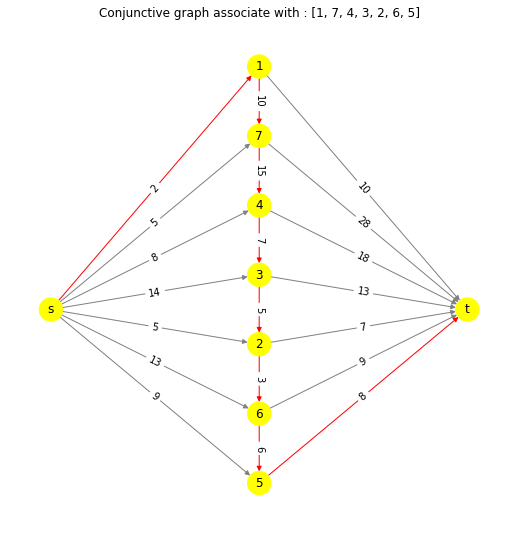

In [24]:
a = [2,5,14,8,9,13,5]
d = [10,3,5,7,6,6,15]
q = [0,4,8,11,2,3,13]

r = Node(N,a,d,q)


start = time.time()
solution = branch_n_bound(N , a , d , q)
end = time.time()-start

## print of the solution
print("--- Solution of the one machine sequencing problem ---")
print()
print("optimal value : ",solution['UB'])
print("schedule : ",solution['SCHD'])
print("running time : ",end)
print()
print("--- The conjunctive graph ---")

lg_path = r._longest_path(solution['SCHD'])['path']

r._print_graph(solution['SCHD'] , lg_path, 7 , 7)

In [27]:
2+10+15+7+5+3+6+8

56

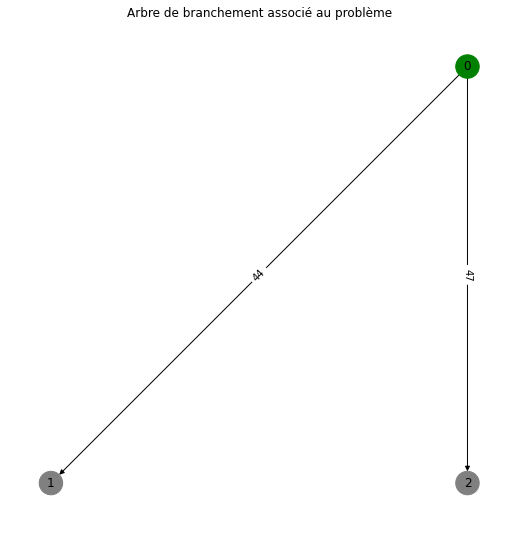

In [28]:
print_bb_tree(solution['Tree'])